In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install numpy==1.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-j1x83qvl
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-j1x83qvl
     |████████████████████████████████| 596 kB 24.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65351 sha256=c803bca14f984764bbb79823a15cf19c99ebb5f96cd0a685ddc13a3032e8665a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3orheby9/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=9395eaa3d62eaee34c2023cdf394dad4dfb22bbe9c93f4892c58a72220393920
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.3 MB 104.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires numpy>=1.18, but you have numpy 1.17.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.17.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.17.0 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.17.0 which is incompatible.
pywavelets 1.3.0 requires numpy>=1.17.3, but you have numpy 1.17.0 which is incompatible.
pandas 1.3.5 requires numpy>=1.17.3; platform_mach

In [2]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 26.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.0
    Uninstalling numpy-1.17.0:
      Successfully uninstalled numpy-1.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [11]:
!rm /content/weights -r
!ln -s /content/drive/'My Drive'/CV/weights /content

In [1]:
!gdown 1grVZhVyJumooKj350aVbMafo_1yjqYc5
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1grVZhVyJumooKj350aVbMafo_1yjqYc5
To: /content/dataset.zip
100% 1.84G/1.84G [00:34<00:00, 53.1MB/s]
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/019410b1fcf0625f608b4ce97629ab55.jpeg  
  inflating: dataset/test/02fa602bb3c7abacdbd7e6afd56ea7bc.jpeg  
  inflating: dataset/test/0398846f67b5df7cdf3f33c3ca4d5060.jpeg  
  inflating: dataset/test/05734fbeedd0f9da760db74a29abdb04.jpeg  
  inflating: dataset/test/05b78a91391adc0bb223c4eaf3372eae.jpeg  
  inflating: dataset/test/0619ebebe9e9c9d00a4262b4fe4a5a95.jpeg  
  inflating: dataset/test/0626ab4ec3d46e602b296cc5cfd263f1.jpeg  
  inflating: dataset/test/0a0317371a966bf4b3466463a3c64db1.jpeg  
  inflating: dataset/test/0a5f3601ad4f13ccf1f4b331a412fc44.jpeg  
  inflating: dataset/test/0af3feff05dec1eb3a70b145a7d8d3b6.jpeg  
  inflating: dataset/test/0fca6a4248a41e8db8b4ed633b456aaa.jpeg  
  inflating: dataset/test/1002ec4a1fe748f3085f1ce88

In [18]:
import os
import json
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import xmltodict
import json
from pycocotools import mask
from xml.dom import minidom
from collections import OrderedDict

In [ ]:
from detectron2.data.datasets import register_coco_instances
# datasets' unique names to register
train_name = "neopolyp_train"
test_name = "neopolyp_test"

image_root = "/content/dataset/train"
instances_json = "/content/dataset/train.json"
instances_test_json = "/content/dataset/val.json"

register_coco_instances(train_name, {}, instances_json, image_root)
register_coco_instances(test_name, {}, instances_test_json, image_root)

# meta_train = MetadataCatalog.get(train_name)
# dicts_train = DatasetCatalog.get(train_name)

In [46]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

# set hyper parameters
cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (train_name,)
cfg.DATASETS.TEST = (test_name, )   
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.CHECKPOINT_PERIOD = 500
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 20000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
cfg.OUTPUT_DIR = "weights/resnext101"
cfg.INPUT.MASK_FORMAT = 'bitmask'

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[07/23 13:31:21 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir output

In [31]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
# set config
cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 # 3 classes (data, fig, hazelnut)
cfg.OUTPUT_DIR = "/content/weights"
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

In [34]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(True)

[07/23 13:14:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [35]:
from detectron2.engine.defaults import DefaultPredictor
from detectron2.data.catalog import MetadataCatalog, DatasetCatalog
predictor = DefaultPredictor(cfg)
meta_test = MetadataCatalog.get(test_name)
dicts_test = DatasetCatalog.get(test_name)

evaluator = COCOEvaluator(test_name, cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, test_name)
inference_on_dataset(trainer.model, test_loader, evaluator)

[07/23 13:15:08 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[07/23 13:15:08 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up:
| Names in Model    | Names in Checkpoint                         | Shapes                                          |
|:------------------|:--------------------------------------------|:------------------------------------------------|
| res2.0.conv1.*    | res2_0_branch2a_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| res2.0.conv2.*    | res2_0_branch2b_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| res2.0.conv3.*    | res2_0_branch2c_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,256,1,1)       |
| res2.0.shortcut.* | res2_0_branch1_{bn_b,bn_rm,bn_riv,bn_s,w}   | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| res2.1.conv1.*    | res2_1_branch2a_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,2

backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  linear.{bias, weight}


[07/23 13:15:08 d2.data.datasets.coco]: Loaded 50 images in COCO format from /content/dataset/val.json
WARNING [07/23 13:15:08 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/23 13:15:08 d2.data.datasets.coco]: Loaded 50 images in COCO format from /content/dataset/val.json
[07/23 13:15:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/23 13:15:08 d2.data.common]: Serializing 50 elements to byte tensors and concatenating them all ...
[07/23 13:15:08 d2.data.common]: Serialized dataset takes 0.12 MiB
[07/23 13:15:08 d2.evaluation.evaluator]: Start inference on 50 batches
[07/23 13:15:12 d2.evaluation.evaluator]: Inference done 11/50. Dataloading: 0.0017 s/iter. Inference: 0.2326 s/iter. Eval: 0.0582 s/iter. Total: 0.2926 s/iter. ETA=0:00:11
[07/23 13:15:17 d2.evaluation

OrderedDict([('bbox',
              {'AP': 34.64544552329974,
               'AP-neoplastic_polyps': 53.38628749639314,
               'AP-non_neoplastic_polyps': 15.904603550206348,
               'AP50': 62.26462187822845,
               'AP75': 41.98457124146055,
               'APl': 37.22814228266753,
               'APm': 0.0,
               'APs': nan}),
             ('segm',
              {'AP': 43.913868043444424,
               'AP-neoplastic_polyps': 68.3794376144389,
               'AP-non_neoplastic_polyps': 19.44829847244995,
               'AP50': 66.56740437699231,
               'AP75': 53.240932942880704,
               'APl': 47.30550141309373,
               'APm': 0.0,
               'APs': nan})])

In [37]:
import random
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab.patches import cv2_imshow
meta_test = MetadataCatalog.get(test_name)
dicts_test = DatasetCatalog.get(test_name)
for d in random.sample(dicts_test, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=meta_test, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

#Test Ảnh


In [38]:
from detectron2.engine.defaults import DefaultPredictor
cfg.MODEL.WEIGHTS = os.path.join("/content/weights/resnext101/", "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[07/23 13:16:26 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

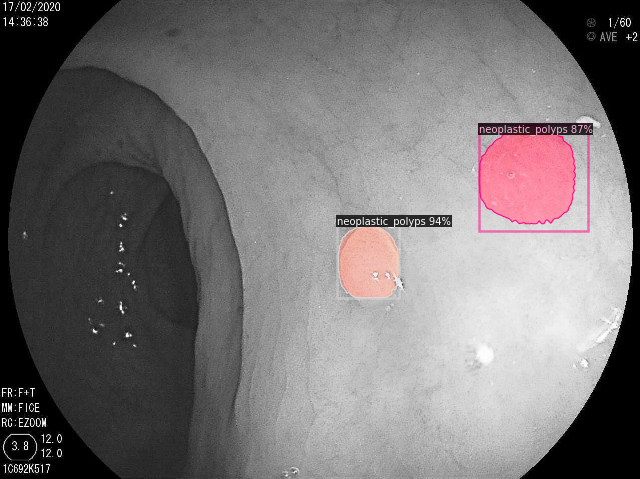

In [44]:
from detectron2.utils.visualizer import ColorMode 
im = cv2.imread("/content/dataset/test/02fa602bb3c7abacdbd7e6afd56ea7bc.jpeg")
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                metadata=meta_test, 
                scale=0.5, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [43]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(test_name, output_dir="./output")
val_loader = build_detection_test_loader(cfg, test_name)
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[07/23 13:18:23 d2.data.datasets.coco]: Loaded 50 images in COCO format from /content/dataset/val.json
[07/23 13:18:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/23 13:18:23 d2.data.common]: Serializing 50 elements to byte tensors and concatenating them all ...
[07/23 13:18:23 d2.data.common]: Serialized dataset takes 0.12 MiB
[07/23 13:18:23 d2.evaluation.evaluator]: Start inference on 50 batches
[07/23 13:18:26 d2.evaluation.evaluator]: Inference done 11/50. Dataloading: 0.0022 s/iter. Inference: 0.2302 s/iter. Eval: 0.0071 s/iter. Total: 0.2396 s/iter. ETA=0:00:09
[07/23 13:18:31 d2.evaluation.evaluator]: Inference done 32/50. Dataloading: 0.0033 s/iter. Inference: 0.2306 s/iter. Eval: 0.0076 s/iter. Total: 0.2417 s/iter. ETA=0:00:04
[07/23 13:18:35 d2.evaluation.evaluator]: Total inference time: 0:00:10.932115 (0.242936 s / iter per device, on 1 devices)
[07/2